# <font color='yellow'>Hackaton IA 2023</font>

Este es el proyecto final de Inteligencia Artificial - Universidad de Mendoza 2023 - Sede San Rafael

Usaremos el dataset [Restaurant Revenue Prediction](https://www.kaggle.com/competitions/restaurant-revenue-prediction/data) para este trabajo.

Alumnos: Lucas A. Galdame Villegas - Santiago Moyano

Profesor a cargo: Bioing. Ignacio Bosch

### Carga de datos desde Google Drive

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Trabajos Practicos IA 2023/archivos/restaurant-revenue-prediction/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Trabajos Practicos IA 2023/archivos/restaurant-revenue-prediction/test.csv')

### Analisis Exploratorio de Datos

In [ ]:
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [ ]:
train.isna().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [ ]:
train["Open Date"] = pd.to_datetime(train["Open Date"])
train["Day"] = train["Open Date"].dt.day
train["Day_Name"] = train["Open Date"].dt.day_name()
train["Month"] = train["Open Date"].dt.month
train["Years"] = train["Open Date"].dt.year
train.drop("Open Date",axis=1,inplace=True)

In [ ]:
test["Open Date"] = pd.to_datetime(test["Open Date"])
test["Day"] = test["Open Date"].dt.day
test["Day_Name"] = test["Open Date"].dt.day_name()
test["Month"] = test["Open Date"].dt.month
test["Years"] = test["Open Date"].dt.year
test.drop("Open Date",axis=1,inplace=True)

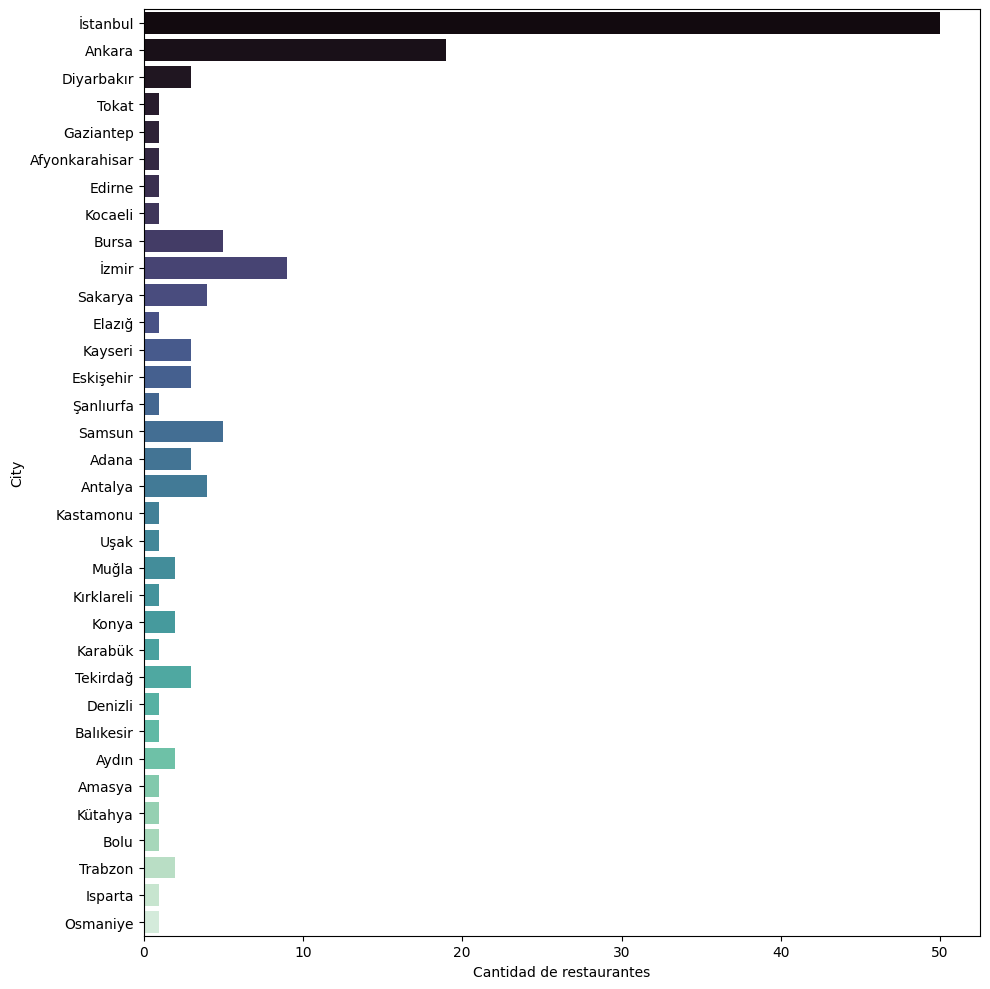

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y=train['City'],palette="mako")
plt.xlabel("Cantidad de restaurantes")
plt.tight_layout()

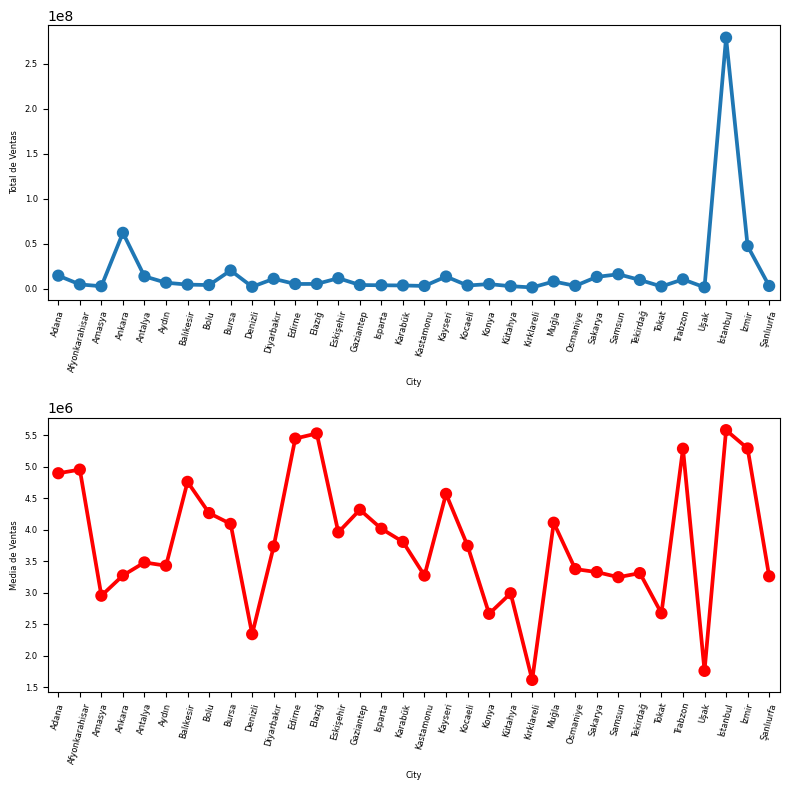

In [ ]:
city_df = train.groupby("City")["revenue"].agg(["mean","sum"]).reset_index()
fig , ax = plt.subplots(2,1,figsize=(8,8))
ax1 = sns.pointplot(x=city_df["City"],y=city_df["sum"],ax=ax[0])
ax1.tick_params(axis="x",labelsize=6,labelrotation=75)
ax1.tick_params(axis="y",labelsize=6)
ax1.set_xlabel("City",fontsize=6)
ax1.set_ylabel("Total de Ventas",fontsize=6)
ax2 = sns.pointplot(x=city_df["City"],y=city_df["mean"],ax=ax[1],color="r")
ax2.tick_params(axis="x",labelsize=6,labelrotation=75)
ax2.tick_params(axis="y",labelsize=6)
ax2.set_xlabel("City",fontsize=6)
ax2.set_ylabel("Media de Ventas",fontsize=6)
plt.tight_layout()

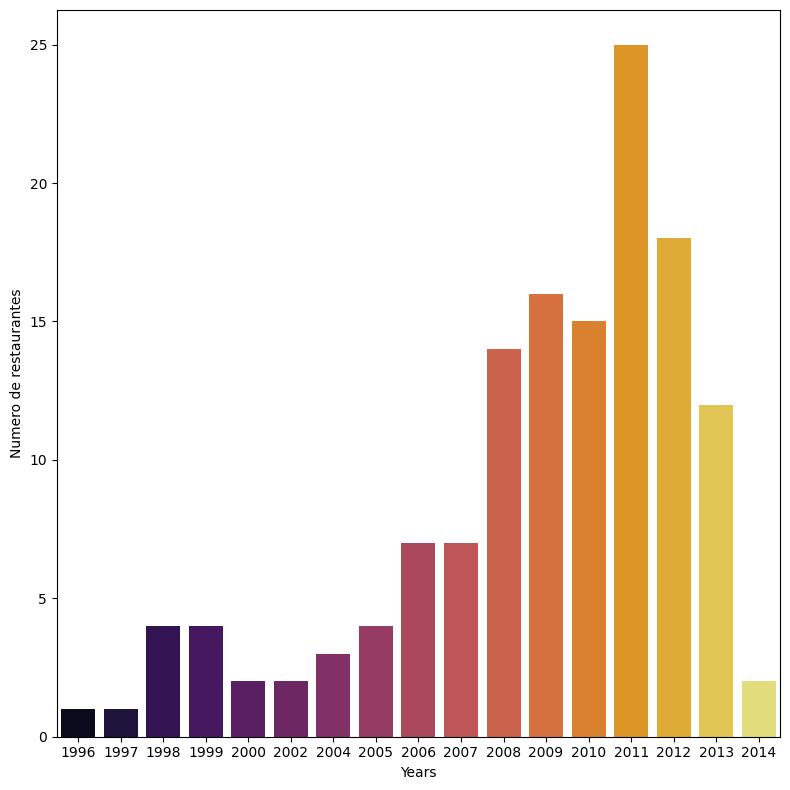

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x=train["Years"],palette="inferno")
plt.ylabel("Numero de restaurantes")
plt.tight_layout()

(array([36., 60., 23., 10.,  5.,  0.,  1.,  0.,  1.,  1.]),
 array([ 1149870. ,  3004576.9,  4859283.8,  6713990.7,  8568697.6,
        10423404.5, 12278111.4, 14132818.3, 15987525.2, 17842232.1,
        19696939. ]),
 <BarContainer object of 10 artists>)

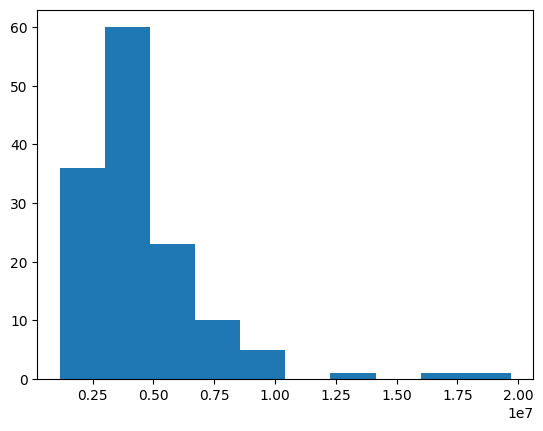

In [ ]:
plt.hist(train["revenue"])

<ipython-input-42-147900d96371>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["revenue"])


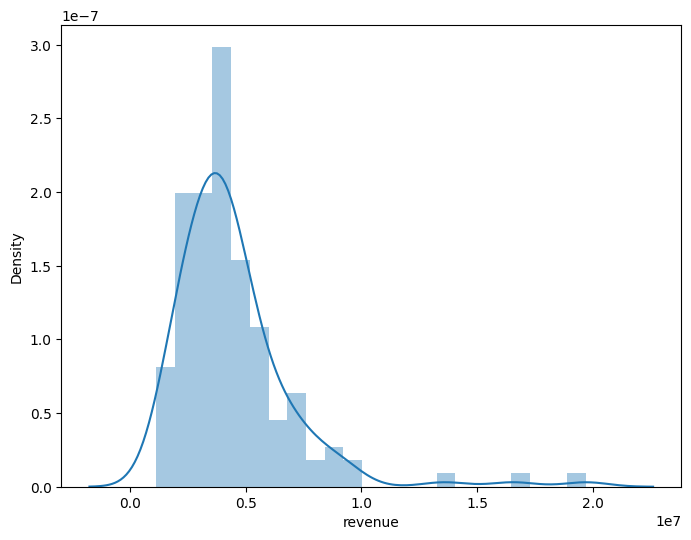

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.distplot(train["revenue"])
plt.show()

In [ ]:
train.corr()["revenue"].sort_values(ascending=False)

<ipython-input-43-2bde734025b3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()["revenue"].sort_values(ascending=False)


revenue    1.000000
P2         0.191518
P28        0.155534
P6         0.139094
P21        0.097411
P11        0.084247
P22        0.083562
P1         0.070217
P17        0.067137
P7         0.051165
P23        0.045507
P25        0.036365
P4         0.035685
P19        0.027984
P24        0.014222
P20        0.014147
P14        0.006441
Month      0.003335
P15        0.000742
Day       -0.003555
Id        -0.006277
P26       -0.007650
P27       -0.013680
P37       -0.019051
P3        -0.024613
P5        -0.028191
P33       -0.032426
P18       -0.034537
P16       -0.037997
P31       -0.040418
P35       -0.050156
P9        -0.050352
P36       -0.050534
P12       -0.062193
P32       -0.065857
P30       -0.066203
P34       -0.072343
P10       -0.073220
P8        -0.084215
P13       -0.105085
P29       -0.114846
Years     -0.326140
Name: revenue, dtype: float64

<Axes: xlabel='City', ylabel='count'>

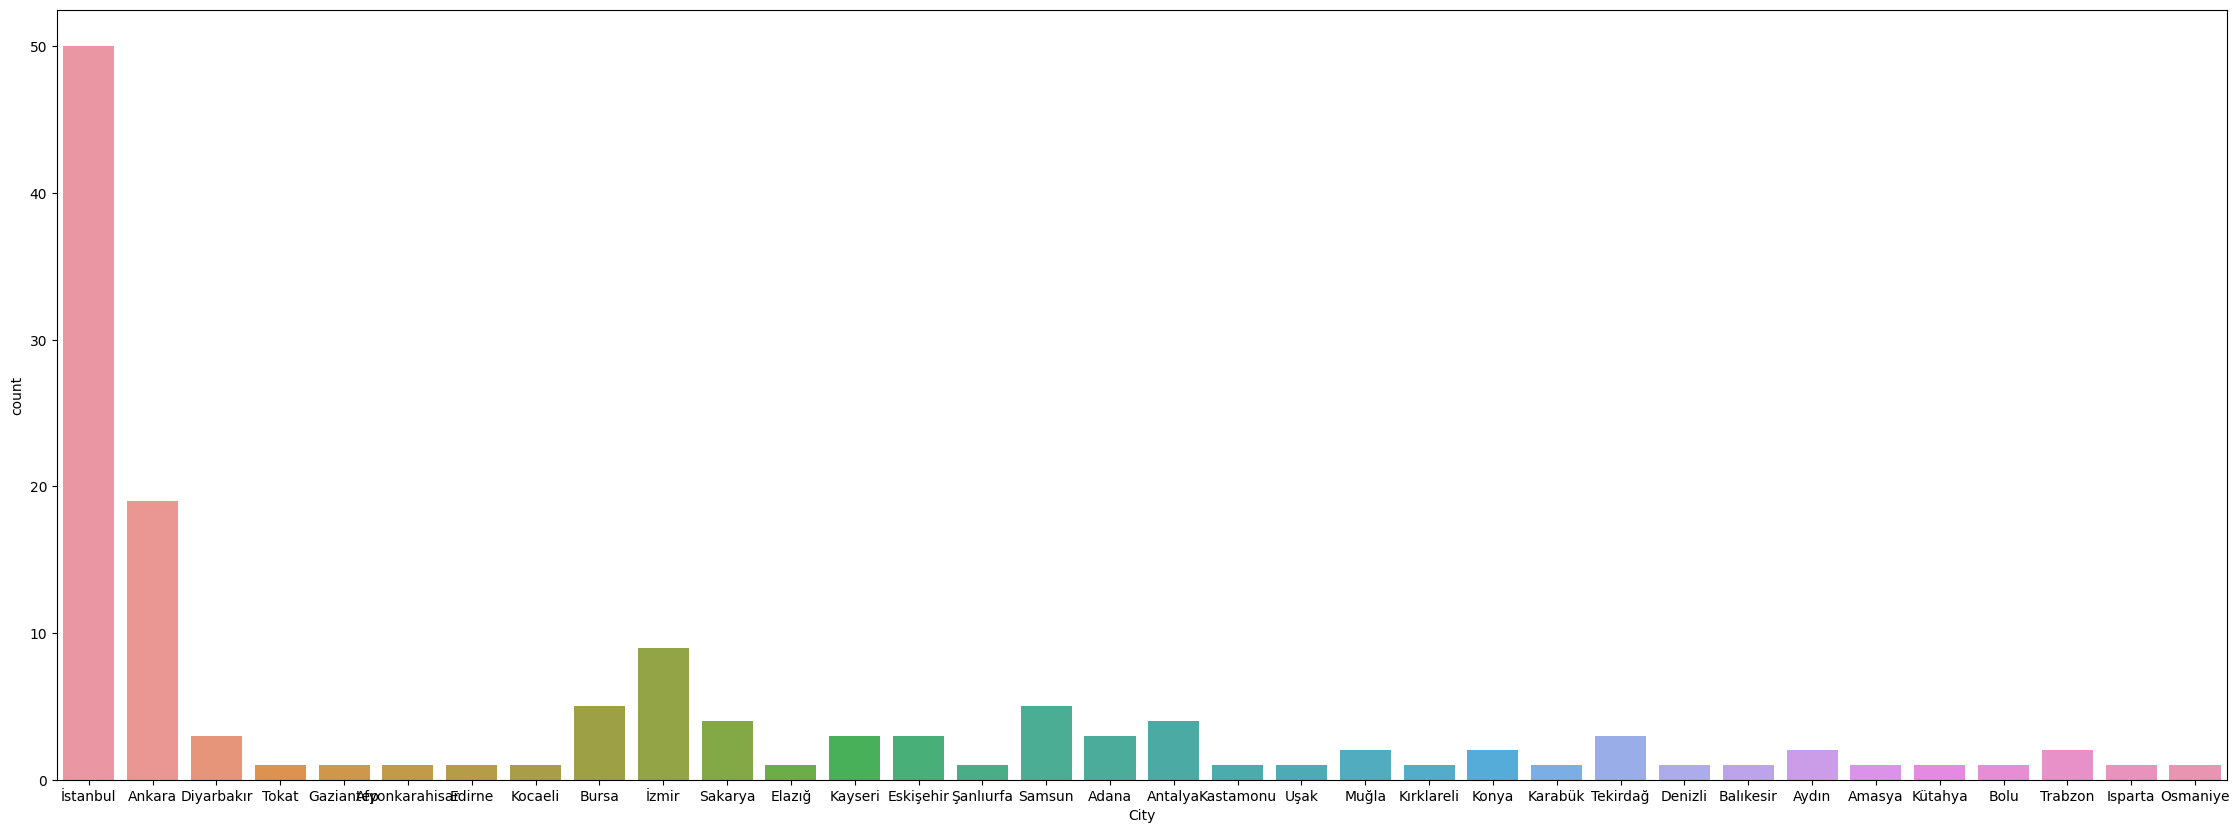

In [ ]:
plt.figure(figsize=(28,10))
sns.countplot(data =train, x = "City")

In [ ]:
train.shape

(137, 46)

In [ ]:
train["City"].value_counts

<bound method IndexOpsMixin.value_counts of 0        İstanbul
1          Ankara
2      Diyarbakır
3           Tokat
4       Gaziantep
          ...    
132       Trabzon
133         İzmir
134       Kayseri
135      İstanbul
136      İstanbul
Name: City, Length: 137, dtype: object>

<ipython-input-47-8b7568dd863f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),cmap="jet",annot=True,lw=3)


<Axes: >

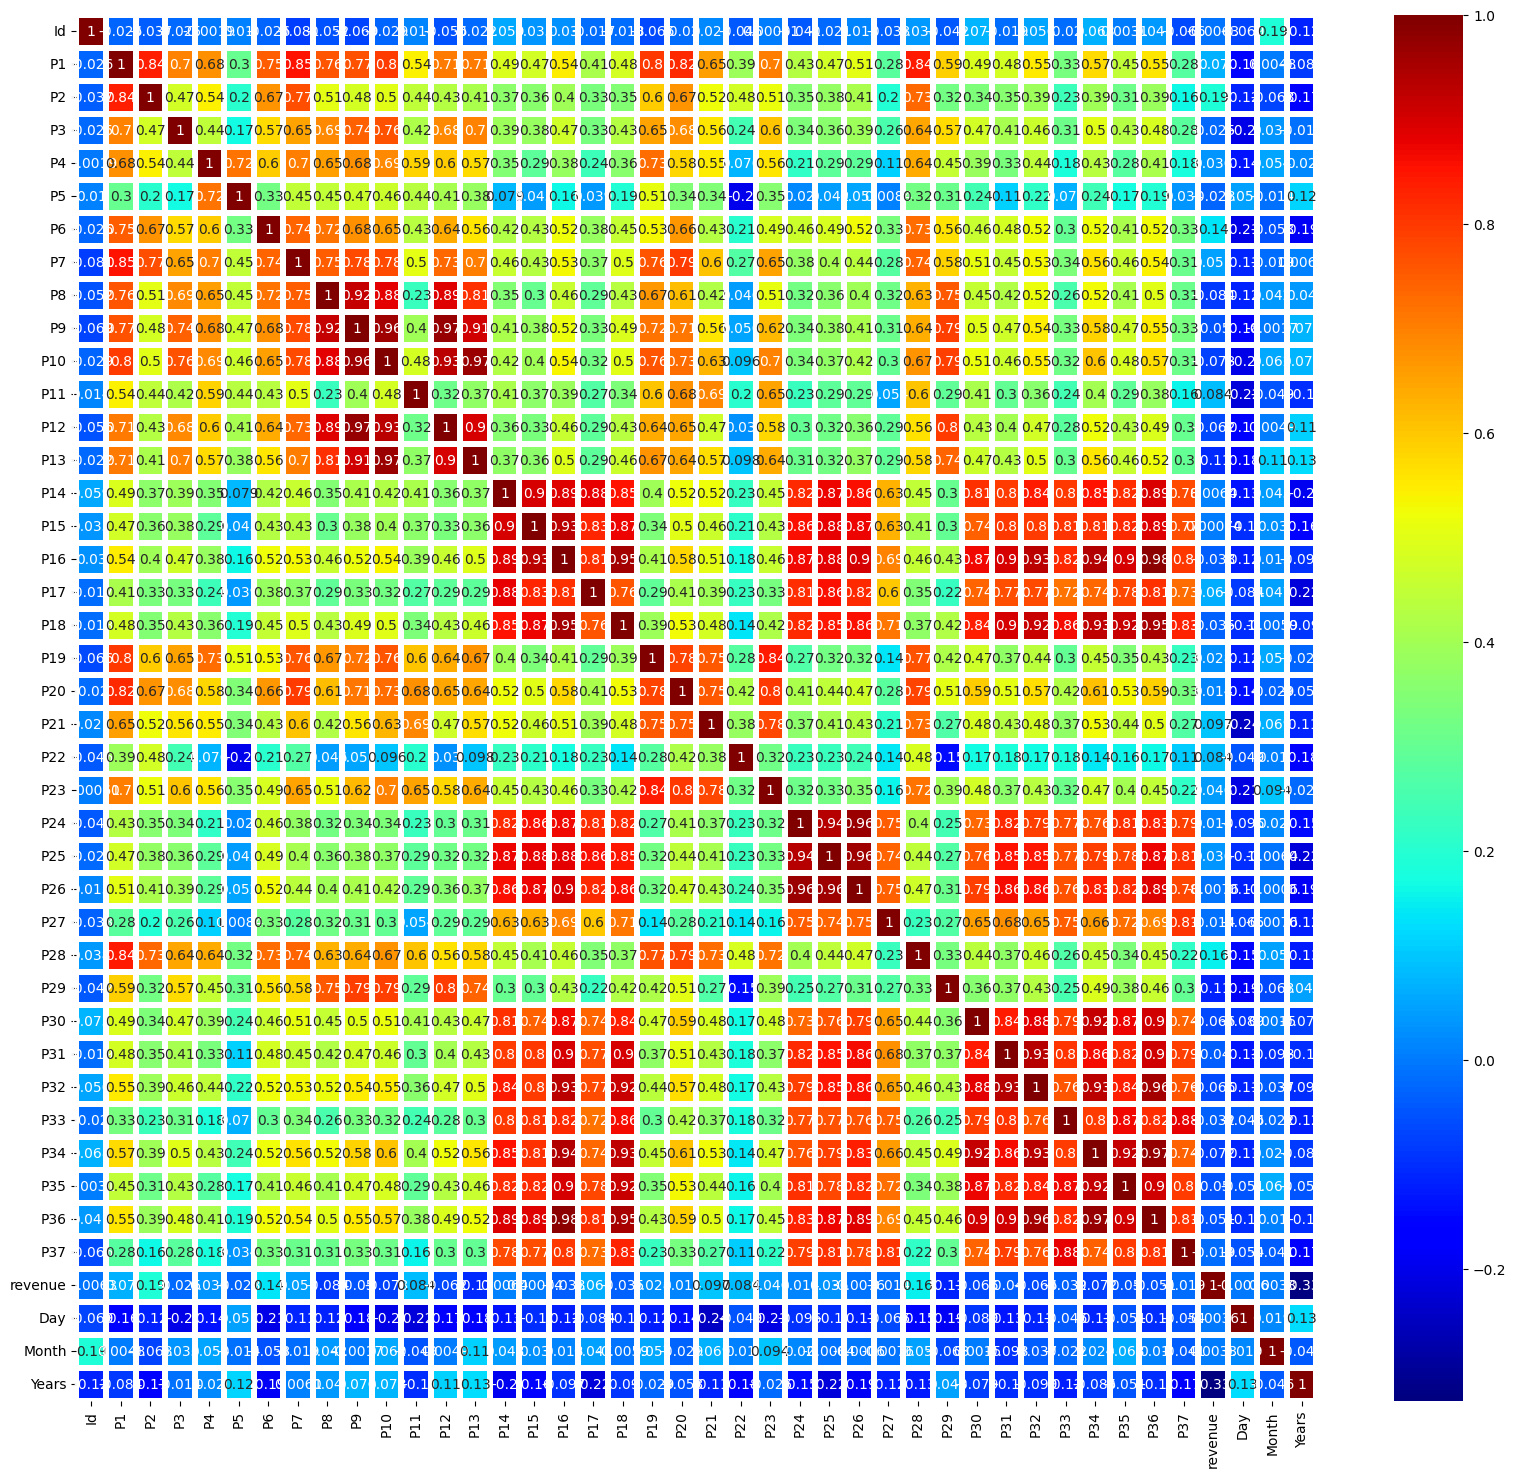

In [ ]:
plt.figure(figsize=(20,18))
sns.heatmap(train.corr(),cmap="jet",annot=True,lw=3)

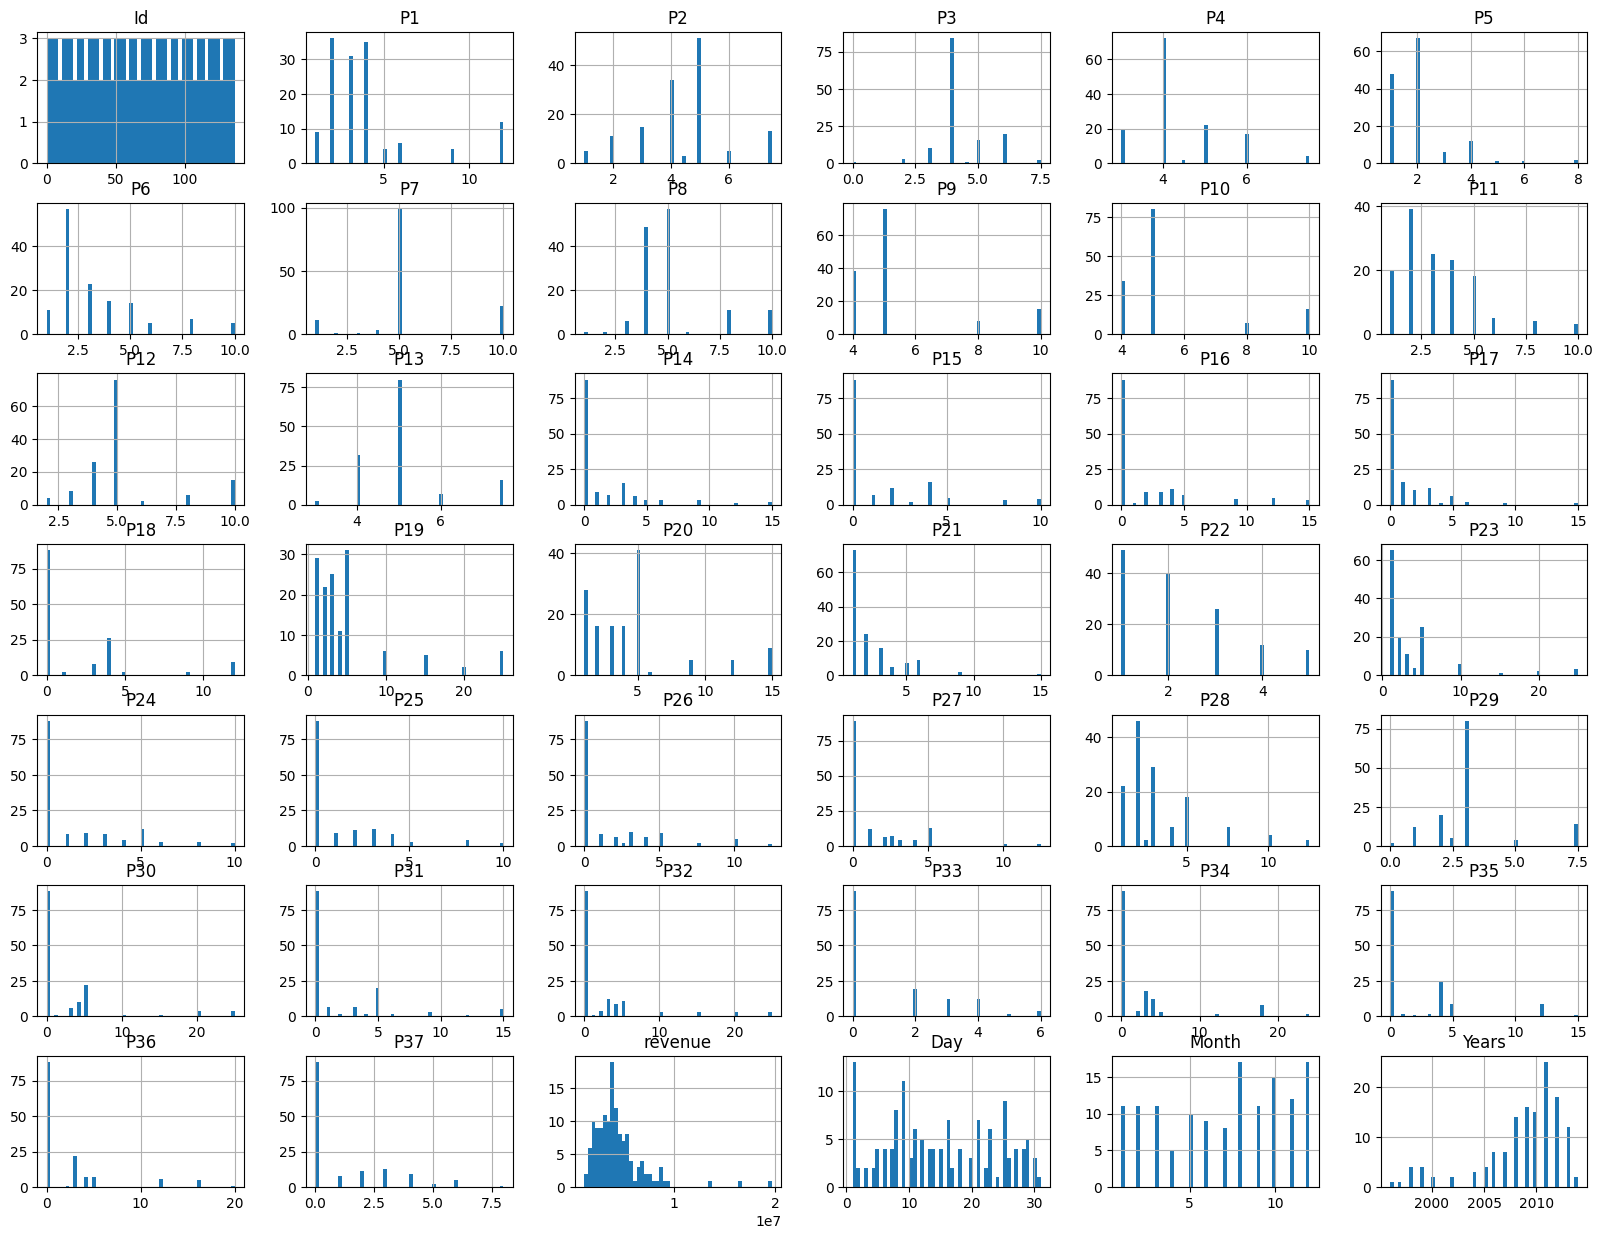

In [ ]:
train.hist(bins = 50, figsize=(20, 15))
plt.show()

In [ ]:
train["City"].unique

<bound method Series.unique of 0        İstanbul
1          Ankara
2      Diyarbakır
3           Tokat
4       Gaziantep
          ...    
132       Trabzon
133         İzmir
134       Kayseri
135      İstanbul
136      İstanbul
Name: City, Length: 137, dtype: object>

In [ ]:
train.head

<bound method NDFrame.head of       Id        City  City Group Type  P1   P2   P3   P4  P5  P6  ...  P33  \
0      0    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2   2  ...    5   
1      1      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1   2  ...    0   
2      2  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2   3  ...    0   
3      3       Tokat       Other   IL   6  4.5  6.0  6.0   4   4  ...    6   
4      4   Gaziantep       Other   IL   3  4.0  3.0  4.0   2   2  ...    2   
..   ...         ...         ...  ...  ..  ...  ...  ...  ..  ..  ...  ...   
132  132     Trabzon       Other   FC   2  3.0  3.0  5.0   4   2  ...    0   
133  133       İzmir  Big Cities   FC   4  5.0  4.0  4.0   2   3  ...    0   
134  134     Kayseri       Other   FC   3  4.0  4.0  4.0   2   3  ...    0   
135  135    İstanbul  Big Cities   FC   4  5.0  4.0  5.0   2   2  ...    0   
136  136    İstanbul  Big Cities   FC   4  5.0  3.0  5.0   2   2  ...    0   

     P34  P35  P36  P37    revenu

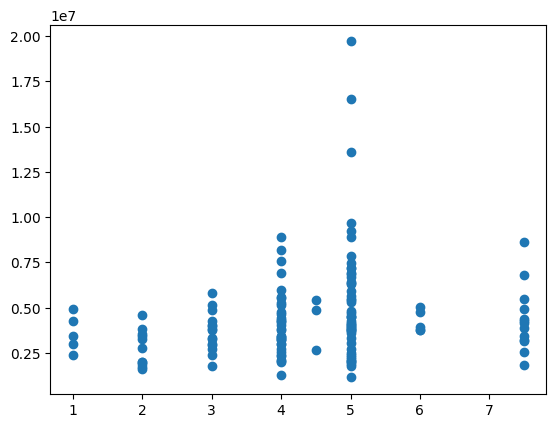

In [ ]:
plt.scatter(train["P2"],train["revenue"])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder()
oh.fit_transform(train[["City"]]).toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
train["City"]

0        İstanbul
1          Ankara
2      Diyarbakır
3           Tokat
4       Gaziantep
          ...    
132       Trabzon
133         İzmir
134       Kayseri
135      İstanbul
136      İstanbul
Name: City, Length: 137, dtype: object

In [ ]:
X = train.drop(columns=['revenue','City','Years', 'Day_Name'], axis = 1)
X.head()

,Id,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P30,P31,P32,P33,P34,P35,P36,P37,Day,Month
0,0,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,5,3,4,5,5,4,3,4,17,7
1,1,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,0,14,2
2,2,Other,IL,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,0,0,0,9,3
3,3,Other,IL,6,4.5,6.0,6.0,4,4,10,...,25,12,10,6,18,12,12,6,2,2
4,4,Other,IL,3,4.0,3.0,4.0,2,2,5,...,5,1,3,2,3,4,3,3,9,5


In [ ]:
Y=train["revenue"]

In [ ]:
train["Type"].nunique()

3

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

lab_en  = LabelEncoder()
std_scaler = StandardScaler()
lin_reg = LinearRegression()

model = Pipeline([
                  ("LabelEncoder", lab_en),
                  ("StandardScaler", std_scaler),
                  ("LinearRegression", lin_reg),
])

In [ ]:
y=Y.values.reshape(-1,1)

In [ ]:
Y.shape

(137,)

In [ ]:
X.shape

(137, 42)

In [ ]:
X.head()

,Id,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P30,P31,P32,P33,P34,P35,P36,P37,Day,Month
0,0,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,5,3,4,5,5,4,3,4,17,7
1,1,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,0,14,2
2,2,Other,IL,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,0,0,0,9,3
3,3,Other,IL,6,4.5,6.0,6.0,4,4,10,...,25,12,10,6,18,12,12,6,2,2
4,4,Other,IL,3,4.0,3.0,4.0,2,2,5,...,5,1,3,2,3,4,3,3,9,5


In [ ]:
print(X.shape, y.shape)

(137, 42) (137, 1)


### Preprocesamiento de datos

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
le = LabelEncoder()
train['City Group'] = le.fit_transform(train['City Group'])
train['Type'] = le.fit_transform(train['Type'])

X = train.drop(columns=['revenue','City','Years', 'Day_Name', 'Month', 'Day'], axis = 1)
Y = train["revenue"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

lab_en1  = LabelEncoder()

In [ ]:
X.head()

,Id,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,0,2,4,5.0,4.0,4.0,2,2,5,...,2.0,3.0,5,3,4,5,5,4,3,4
1,1,0,1,4,5.0,4.0,4.0,1,2,5,...,3.0,3.0,0,0,0,0,0,0,0,0
2,2,1,2,2,4.0,2.0,5.0,2,3,5,...,1.0,3.0,0,0,0,0,0,0,0,0
3,3,1,2,6,4.5,6.0,6.0,4,4,10,...,2.5,7.5,25,12,10,6,18,12,12,6
4,4,1,2,3,4.0,3.0,4.0,2,2,5,...,1.0,3.0,5,1,3,2,3,4,3,3


In [ ]:
le = LabelEncoder()

In [ ]:
X['City Group'] = le.fit_transform(X['City Group'])
X['Type'] = le.fit_transform(X['Type'])

In [ ]:
X.head()

,Id,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,0,2,4,5.0,4.0,4.0,2,2,5,...,2.0,3.0,5,3,4,5,5,4,3,4
1,1,0,1,4,5.0,4.0,4.0,1,2,5,...,3.0,3.0,0,0,0,0,0,0,0,0
2,2,1,2,2,4.0,2.0,5.0,2,3,5,...,1.0,3.0,0,0,0,0,0,0,0,0
3,3,1,2,6,4.5,6.0,6.0,4,4,10,...,2.5,7.5,25,12,10,6,18,12,12,6
4,4,1,2,3,4.0,3.0,4.0,2,2,5,...,1.0,3.0,5,1,3,2,3,4,3,3


### Modelado y entrenamiento

In [ ]:
from sklearn.linear_model import LinearRegression
line_reg = LinearRegression()

In [ ]:
line_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Verificar los nombres de las características
print(X_train.columns)
print(X_test.columns)

# Reordenar las características en los datos de prueba
X_test = X_test.reindex(columns=X_train.columns)

Index(['Id', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
       'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17',
       'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27',
       'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37'],
      dtype='object')
Index(['Id', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
       'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17',
       'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27',
       'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37'],
      dtype='object')


In [ ]:
try:
    y_pred = line_reg.predict(X_test)
except ValueError as e:
    print("Error:", e)
    # Handle the error or continue with alternative logic

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

20051740604515.785

In [ ]:
test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Trabajos Practicos IA 2023/archivos/restaurant-revenue-prediction/test.csv")
test.shape

(100000, 42)

In [ ]:
test= test.drop(columns=['City','Open Date'], axis = 1)
test.shape

(100000, 40)

In [ ]:
test.shape

(100000, 40)

In [ ]:
test['City Group'] = le.fit_transform(test['City Group'])
test['Type'] = le.fit_transform(test['Type'])

In [ ]:
test.head()

,Id,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,1,1,1,4.0,4.0,4.0,1,2,5,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,1,2,3,4.0,4.0,4.0,2,2,5,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,0,1,3,4.0,4.0,4.0,2,2,5,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,1,2,2,4.0,4.0,4.0,2,3,5,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,1,1,2,4.0,4.0,4.0,1,2,5,...,5.0,3.0,0,0,0,0,0,0,0,0


In [ ]:
# Columnas en X_train pero no en test
missing_in_test = set(X_train.columns) - set(test.columns)
print(f"Missing in test: {missing_in_test}")

# Columnas en test pero no en X_train
missing_in_train = set(test.columns) - set(X_train.columns)
print(f"Missing in train: {missing_in_train}")

Missing in test: set()
Missing in train: set()


In [ ]:
set(X_train.columns) - set(test.columns)  # columns present in X_train but not in test

set()

In [ ]:
set(test.columns) - set(X_train.columns)  # columns present in test but not in X_train

set()

In [ ]:
yval=line_reg.predict(test)
yval.shape

(100000,)

In [ ]:
Id=np.arange(0,100000)
Id.shape

(100000,)

In [ ]:
yval.shape

(100000,)

In [ ]:
df=pd.DataFrame({"Id":Id,"Prediction":yval})

In [ ]:
df

,Id,Prediction
0,0,5.329682e+06
1,1,2.183514e+06
2,2,1.608415e+06
3,3,5.503812e+06
4,4,6.467953e+06
...,...,...
99995,99995,5.954687e+08
99996,99996,5.956957e+08
99997,99997,5.990075e+08
99998,99998,5.967259e+08


In [ ]:
sampval=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Trabajos Practicos IA 2023/archivos/restaurant-revenue-prediction/test.csv")
sampval

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,01/05/2000,Antalya,Other,FC,5,5.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
99996,99996,07/18/2011,Niğde,Other,IL,1,2.0,4.0,3.0,1,...,1.0,3.0,5,0,0,0,4,0,0,0
99997,99997,12/29/2012,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,...,4.0,1.0,5,5,3,2,4,4,4,2
99998,99998,10/12/2013,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,4,...,7.5,5.0,0,0,0,4,0,0,0,0


In [ ]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/Trabajos Practicos IA 2023/archivos/restaurant-revenue-prediction/result.csv", index = False)

In [ ]:
result=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Trabajos Practicos IA 2023/archivos/restaurant-revenue-prediction/result.csv')

In [ ]:
result.head(10)

,Id,Prediction
0,0,5.329682e+06
1,1,2.183514e+06
2,2,1.608415e+06
3,3,5.503812e+06
4,4,6.467953e+06
5,5,7.053209e+06
6,6,8.185519e+06
7,7,6.805812e+06
8,8,1.301905e+07
9,9,-1.358823e+07


In [ ]:
result.tail(10)

,Id,Prediction
99990,99990,5.952678e+08
99991,99991,5.998700e+08
99992,99992,5.938893e+08
99993,99993,5.965068e+08
99994,99994,5.979404e+08
99995,99995,5.954687e+08
99996,99996,5.956957e+08
99997,99997,5.990075e+08
99998,99998,5.967259e+08
99999,99999,6.034497e+08


### Graficos y resultados

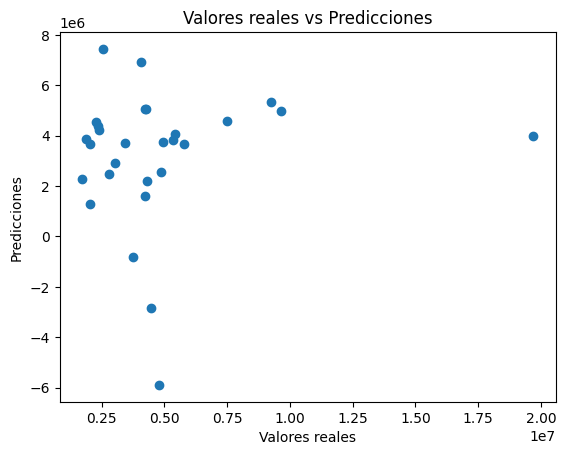

In [ ]:
# Graficar los valores reales vs predichos
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Valores reales vs Predicciones")

plt.show()

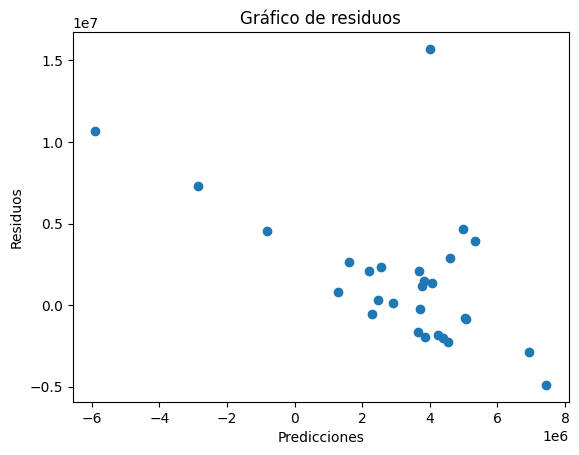

In [ ]:
# Analisis de residuos
plt.scatter(y_pred, y_test-y_pred)
plt.title("Gráfico de residuos")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")

plt.show()

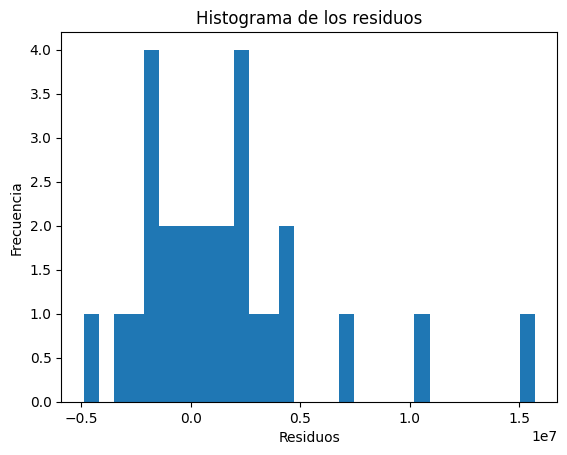

In [ ]:
# Histograma de los residuos
plt.hist(y_test-y_pred, bins=30)
plt.title("Histograma de los residuos")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")

plt.show()

In [ ]:
# Estadisticas de resumen del modelo
import statsmodels.api as sm

X = sm.add_constant(X) # Agregar una constante (intercepto) al modelo
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.013
Date:                Fri, 27 Oct 2023   Prob (F-statistic):              0.465
Time:                        11:58:27   Log-Likelihood:                -2192.1
No. Observations:                 137   AIC:                             4466.
Df Residuals:                      96   BIC:                             4586.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.527e+06   4.82e+06      1.769      0.0

In [ ]:
# Medidas de error
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3007071.6608890304
Mean Squared Error: 20051740604515.785
Root Mean Squared Error: 4477916.993928738
R-squared: -0.6390258637581256


### Otros modelos

In [ ]:
# Probar diferentes modelos de regresion
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = [
    ('lr', LinearRegression()),
    ('ridge', Ridge()),
    ('lasso', Lasso()),
    ('dt', DecisionTreeRegressor()),
    ('rf', RandomForestRegressor())
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} MSE: {mse}")

lr MSE: 20051740604515.785
ridge MSE: 19216933425381.98
lasso MSE: 20051862399313.67
dt MSE: 9864125043334.035


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.348e+14, tolerance: 5.568e+10
  model = cd_fast.enet_coordinate_descent(


rf MSE: 10969318137268.496


In [ ]:
# Ajuste de hiperparámetros
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best score: -5209103849975.023


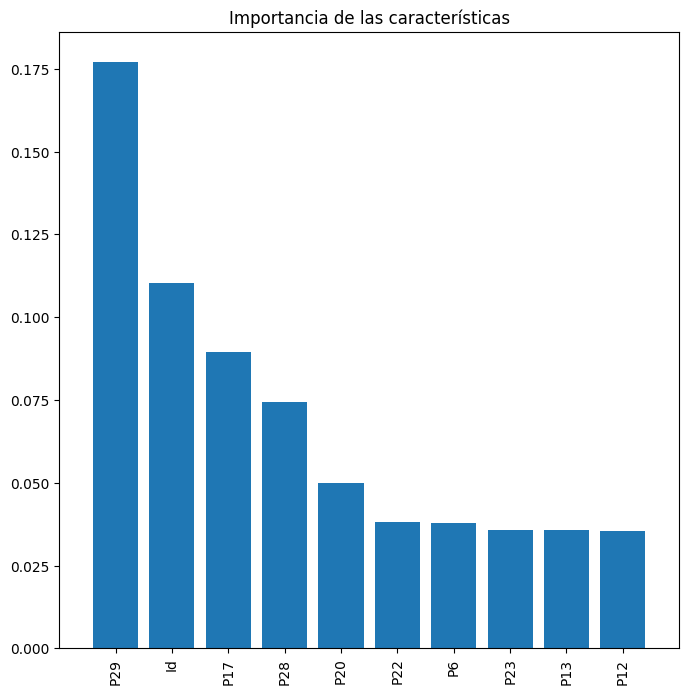

In [ ]:
# Visualizar los resultados
best_rf = grid_search.best_estimator_
importances = best_rf.feature_importances_

indices = np.argsort(importances)[::-1]

# Para que el gráfico sea más claro, solo tomamos las 10 características más importantes
plt.figure(figsize=(8,8))
plt.title("Importancia de las características")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), X_train.columns[indices[:10]], rotation=90)
plt.xlim([-1, 10])

plt.show()